<a href="https://colab.research.google.com/github/ASLManasa/MY_Ml/blob/master/multipleregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [50]:
data=pd.read_csv('/content/50_Startups (1).csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Text(0, 0.5, 'profit')

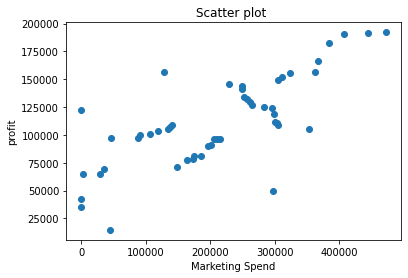

In [51]:
plt.scatter(data['Marketing Spend'],data['Profit'])
plt.title('Scatter plot ')
plt.xlabel('Marketing Spend')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

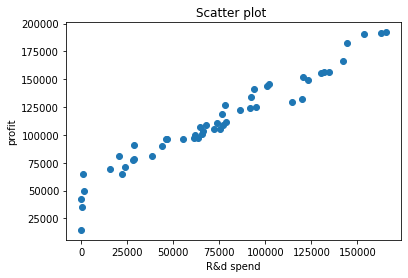

In [52]:
plt.scatter(data['R&D Spend'],data['Profit'])
plt.title('Scatter plot ')
plt.xlabel('R&d spend')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

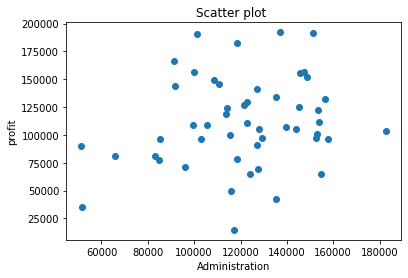

In [53]:
plt.scatter(data['Administration'],data['Profit'])
plt.title('Scatter plot ')
plt.xlabel('Administration')
plt.ylabel('profit')

In [54]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [55]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [56]:
data['NewYork_state'] = np.where(data['State'] =='New York',1,0)
data['California_state'] = np.where(data['State'] =='California',1,0)
data['Florida_state'] = np.where(data['State'] =='Florida',1,0)
data.drop(columns =['State'],axis=1,inplace=True)

In [57]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [58]:
dep = 'Profit'

In [59]:
indep = data.columns.tolist()
indep.remove(dep)
indep

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_state',
 'California_state',
 'Florida_state']

In [60]:
x = data[indep].values
y = data[dep].values


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train[1:5]

array([[0.72539353, 1.        , 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.69225667, 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00437005, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.96660444, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = regressor.predict(x_test)

In [67]:
x_test

array([[0.39946683, 1.24792969, 0.25042853, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0.38481686, 0.52936195, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.56344821, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.16869099, 0.3175591 , 0.34861436, 0.        , 0.        ,
        1.        ],
       [0.92798459, 0.47368785, 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.43609283, 0.72751564, 0.74861321, 1.        , 0.        ,
        0.        ],
       [0.12234465, 0.13931402, 0.39269043, 1.        , 0.        ,
        0.        ],
       [0.36974101, 0.96346814, 0.18698856, 1.        , 0.        ,
        0.        ],
       [0.4475048 , 0.67923905, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.85943772, 0.38102792, 0.77613557, 0.        , 0.        ,
        1.        ],
       [0.33561668, 0.49185108, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0

Task -2

In [68]:
data ={ "Date":["01/01/2020","02/01/2020","03/01/2020","04/01/2020"],
'Temprature':[20,18,19,20],
'Rainfall': [1.1,0.6,0.9,1.0],
'Mosquitos' :[150,217,153,158]
}
df = pd.DataFrame(data)
df

,Date,Temprature,Rainfall,Mosquitos
0,01/01/2020,20,1.1,150
1,02/01/2020,18,0.6,217
2,03/01/2020,19,0.9,153
3,04/01/2020,20,1.0,158


In [69]:
df.iloc[1:3,1:3]

,Temprature,Rainfall
1,18,0.6
2,19,0.9


In [70]:
df.dtypes

Date           object
Temprature      int64
Rainfall      float64
Mosquitos       int64
dtype: object

In [71]:
df.Temprature.max()

20

In [72]:
df.Mosquitos.mean()

169.5

In [73]:
df.Rainfall.min()

0.6